<a href="https://colab.research.google.com/github/bouattara/Data-Science-Projects/blob/main/Exploratory_Data_Analysis_with_Python_and_Pandas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install calmap
import calmap
!pip install pandas-profiling
from pandas_profiling import ProfileReport



<ipython-input-4-f68491751930>:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [7]:
B1 = pd.read_csv('supermarket_sales.csv', header=None, names=['Invoice ID', 'Branch', 'City','Customer type', 'Gender', 'Product line', 'Unit Price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gorss margin percentage', 'gross income', 'Rating' ])

In [ ]:
B1.head()

In [ ]:
 B1.columns

In [10]:
B1.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit Price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gorss margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [11]:
B1['Date']

0       3/6/19
1      2/14/19
2      3/13/19
3      2/10/19
4       1/7/19
        ...   
935    2/22/19
936    2/18/19
937    2/18/19
938    3/10/19
939    1/26/19
Name: Date, Length: 940, dtype: object

In [12]:
B1['Date'] = pd.to_datetime(B1['Date'])

Setting the "Date" column as the index or first column, permanently

In [13]:
B1.set_index('Date', inplace=True)

In [14]:
B1.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-03-06      75-8169      A     Yangon        Member    Male   
2019-02-14  853-23-2453      B   Mandalay        Member    Male   
2019-03-13  877-22-3308      A     Yangon        Member    Male   
2019-02-10  838-78-4295      C  Naypyitaw        Normal  Female   
2019-01-07  109-28-2512      B   Mandalay        Member  Female   

                   Product line  Unit Price  Quantity  Tax 5%    Total   Time  \
Date                                                                            
2019-03-06    Sports and travel       15.81      10.0   7.905  166.005  12:27   
2019-02-14    Health and beauty       75.74       4.0  15.148  318.108  14:35   
2019-03-13    Health and beauty       15.87      10.0   7.935  166.635  16:40   
2019-02-10    Health and beauty       33.47       2.0   3.347   70.287  15:43   
2019-01-07  Fashion accessories       97.61       6.0  29.283  614.943  15:01   

                Payment    cogs  gorss margin percentage  gross income  Rating  
Date                                                                            
2019-03-06  Credit card  158.10                 4.761905         7.905     8.6  
2019-02-14         Cash  302.96                 4.761905        15.148     7.6  
2019-03-13         Cash  158.70                 4.761905         7.935     5.8  
2019-02-10      Ewallet   66.94                 4.761905         3.347     6.7  
2019-01-07      Ewallet  585.66                 4.761905        29.283     9.9

In [15]:
B1.describe()

Unit Price    Quantity      Tax 5%        Total        cogs  \
count  933.000000  920.000000  940.000000   940.000000  940.000000   
mean    55.543258    5.498913   15.288502   321.058545  305.770043   
std     26.509451    2.936395   11.711438   245.940191  234.228753   
min     10.080000    1.000000    0.508500    10.678500   10.170000   
25%     32.710000    3.000000    5.971500   125.401500  119.430000   
50%     54.730000    5.000000   12.048000   253.008000  240.960000   
75%     77.680000    8.000000   22.416750   470.751750  448.335000   
max     99.960000   10.000000   49.650000  1042.650000  993.000000   

       gorss margin percentage  gross income      Rating  
count               940.000000    940.000000  940.000000  
mean                  4.761905     15.288502    6.977234  
std                   0.000000     11.711438    1.719807  
min                   4.761905      0.508500    4.000000  
25%                   4.761905      5.971500    5.500000  
50%                   4.761905     12.048000    6.950000  
75%                   4.761905     22.416750    8.500000  
max                   4.761905     49.650000   10.000000

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

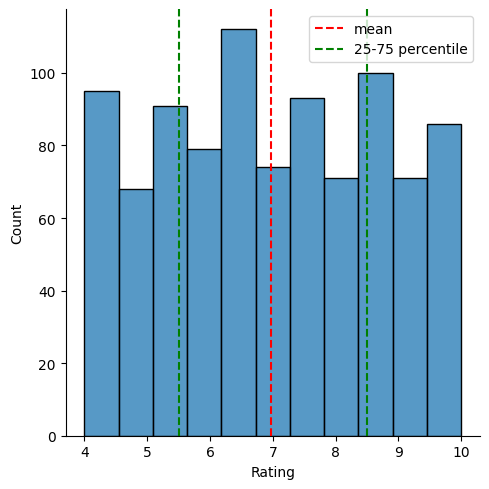

In [16]:
sns.displot(B1['Rating'])
plt.axvline(x=np.mean(B1['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(B1['Rating'], 25), c='green', ls='--', label='25-75 percentile')
plt.axvline(x=np.percentile(B1['Rating'], 75), c='green', ls='--')
plt.legend()

array([[<Axes: title={'center': 'Unit Price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gorss margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

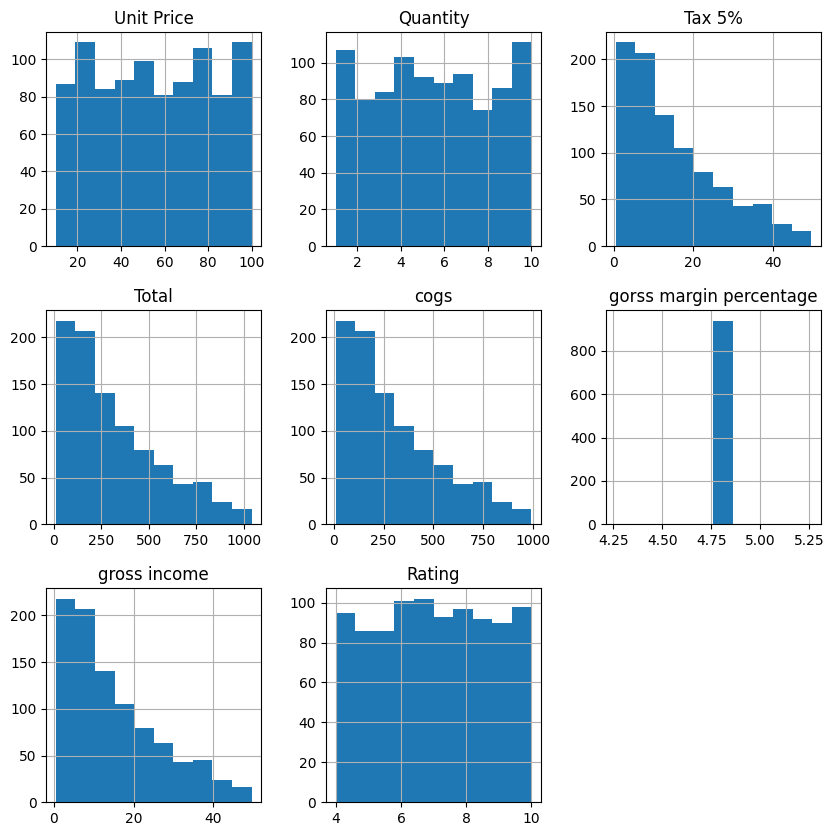

In [17]:
B1.hist(figsize=(10,10))

**Question 2:** Do aggregate sales numbers differ by much between branches?

In [18]:
B1['Branch'].value_counts()

A    318
B    311
C    311
Name: Branch, dtype: int64

seaborn.countplot is used with categorical variables

<Axes: xlabel='Branch', ylabel='count'>

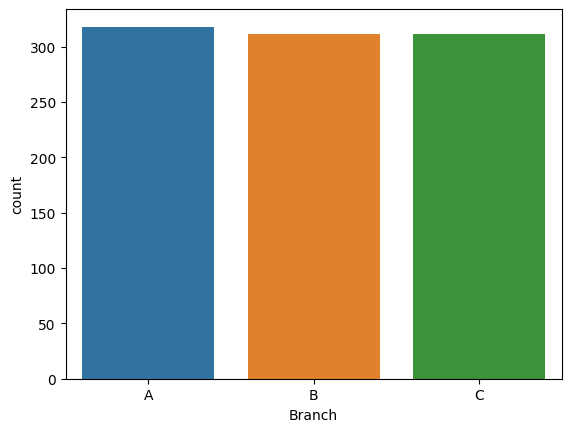

In [19]:
sns.countplot(x='Branch', data=B1)

<Axes: xlabel='Payment', ylabel='count'>

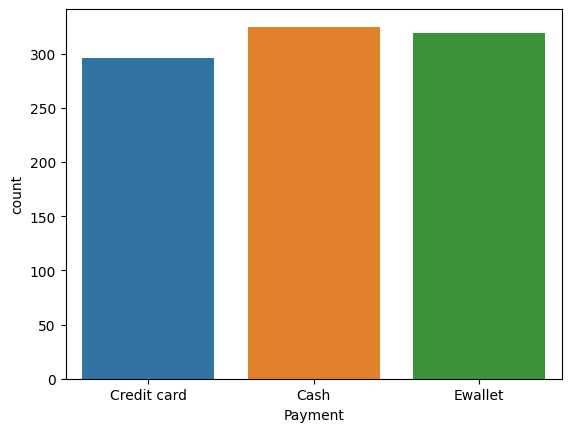

In [20]:
sns.countplot(x='Payment', data=B1)

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

<Axes: xlabel='Rating', ylabel='gross income'>

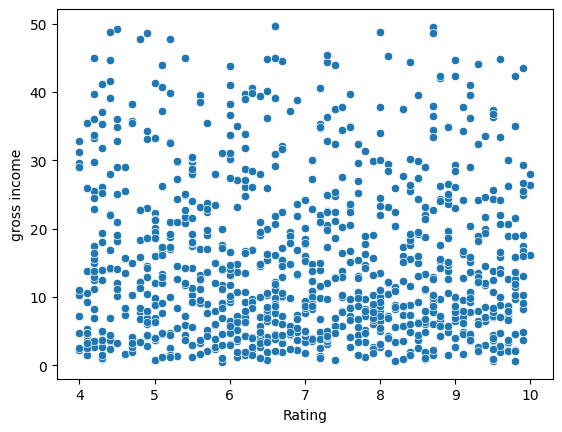

In [21]:
sns.scatterplot(x='Rating', y='gross income', data=B1)

<Axes: xlabel='Rating', ylabel='gross income'>

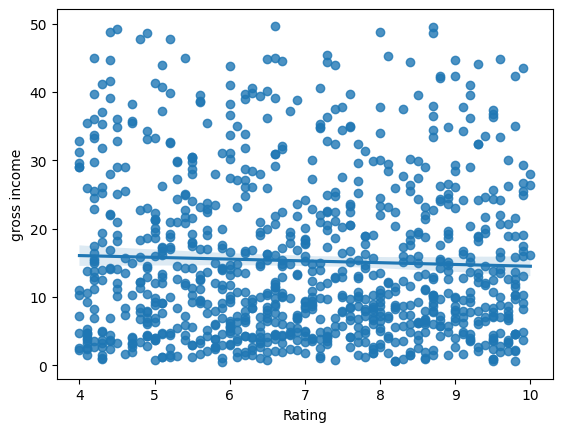

In [22]:
sns.regplot(data=B1, x='Rating', y='gross income')

How does gross income differ per branch

<Axes: xlabel='Branch', ylabel='gross income'>

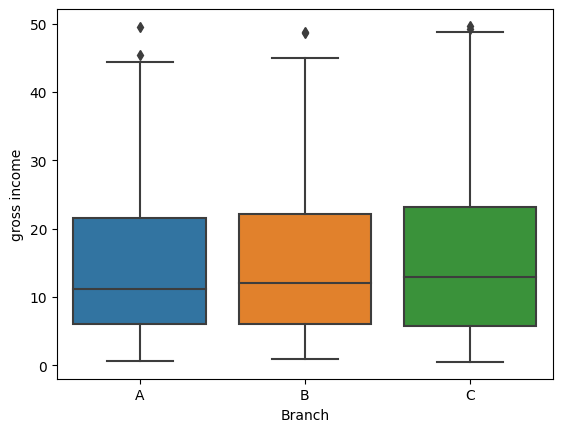

In [23]:
sns.boxplot(x='Branch', y='gross income', data=B1)

How does gross income differ per gender

<Axes: xlabel='Gender', ylabel='gross income'>

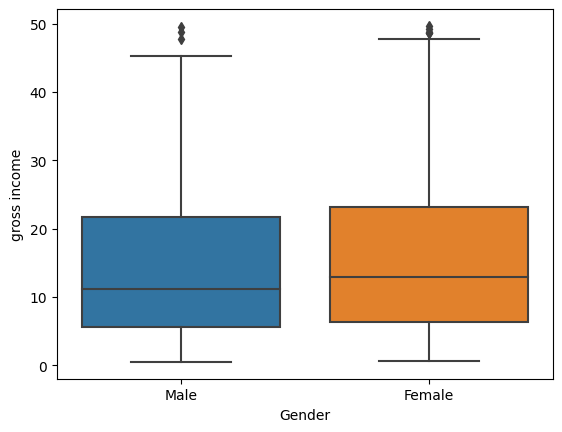

In [24]:
sns.boxplot(x='Gender', y='gross income', data=B1)

**Question 4:** Is there a noticeable time trend in gross income?

Before we plot any graph using Date (time) variable, we need to group Date by the mean, since there can be more than 1 sale in any Date.

In [ ]:
B1.groupby(B1.index).mean()

<ipython-input-32-3f29d8669ab1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  B1.groupby(B1.index).mean()


Unit Price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   53.394545  6.500000  18.561636  389.794364  371.232727   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   60.450000  4.363636  12.933818  271.610182  258.676364   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   58.230000  4.777778  14.866167  312.189500  297.323333   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   65.627143  6.285714  22.270429  467.679000  445.408571   
2019-03-30   67.408182  5.888889  19.424500  407.914500  388.490000   

            gorss margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.561636  6.554545  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     12.933818  7.281818  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     14.866167  6.866667  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     22.270429  7.100000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

<Axes: xlabel='Date', ylabel='gross income'>

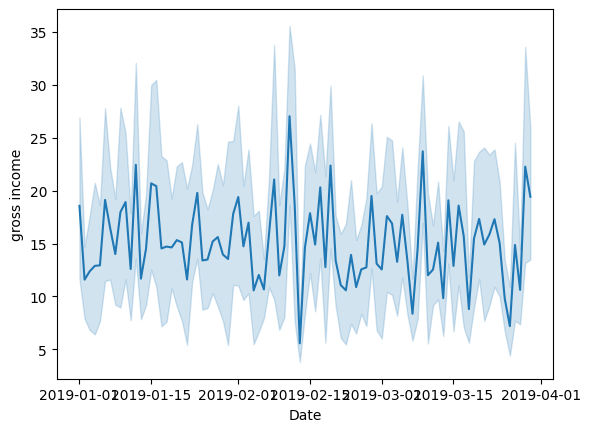

In [ ]:
sns.lineplot(x=B1.index, y='gross income', data=B1)

seaborn.pairplot let you plot all the bivariate relationships in the dataset

<ipython-input-44-8843156eba46>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pairplot(B1.groupby(B1.index).mean())


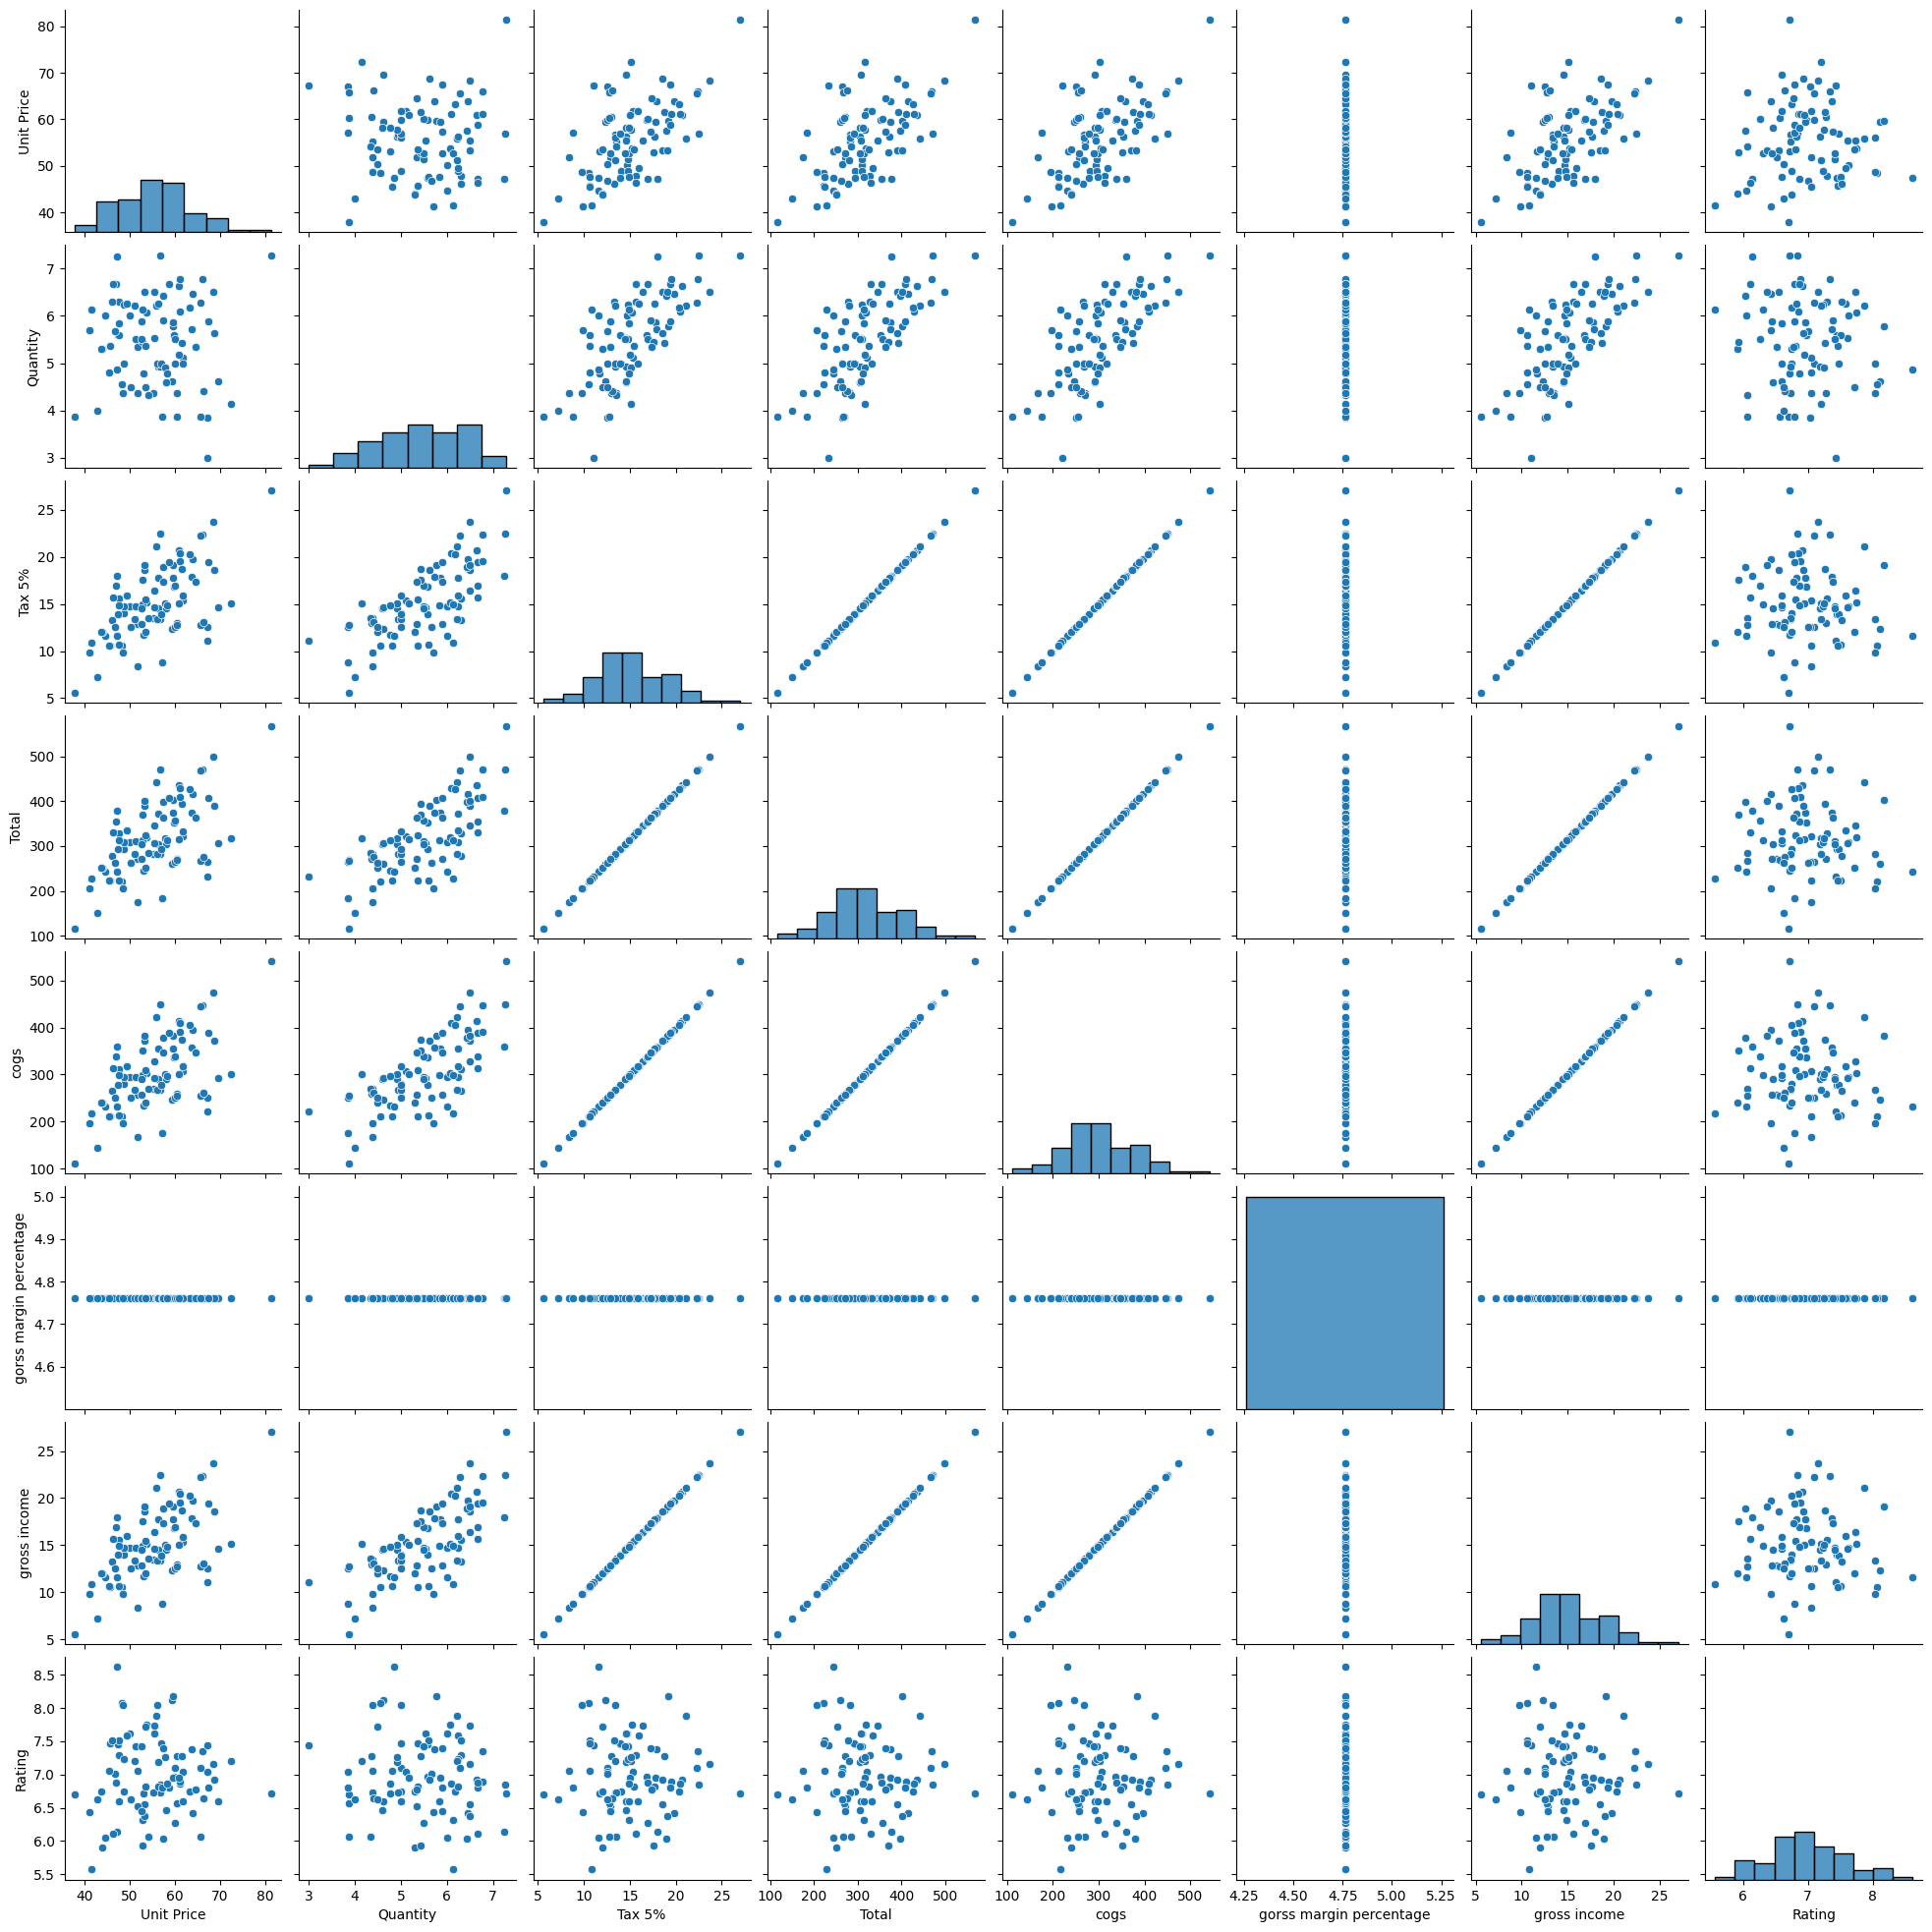

In [ ]:
sns.pairplot(B1.groupby(B1.index).mean())

### Task 4: Dealing With Duplicate Rows and Missing Values

In [ ]:
B1.duplicated().sum()

0

In [ ]:
B1[B1.duplicated()==True]

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit Price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gorss margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

In [ ]:
B1.drop_duplicates(inplace=True)

Missing Values

In [ ]:
B1.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              73
Gender                      0
Product line               39
Unit Price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gorss margin percentage     0
gross income                0
Rating                      0
dtype: int64

PERCENTAGE OF MISSING VALUES

In [ ]:
B1.isna().sum()/len(B1)

Invoice ID                 0.000000
Branch                     0.000000
City                       0.000000
Customer type              0.077908
Gender                     0.000000
Product line               0.041622
Unit Price                 0.006403
Quantity                   0.020277
Tax 5%                     0.000000
Total                      0.000000
Time                       0.000000
Payment                    0.000000
cogs                       0.000000
gorss margin percentage    0.000000
gross income               0.000000
Rating                     0.000000
dtype: float64

sns.heatmap can let us see missing values on a heatmap

<Axes: ylabel='Date'>

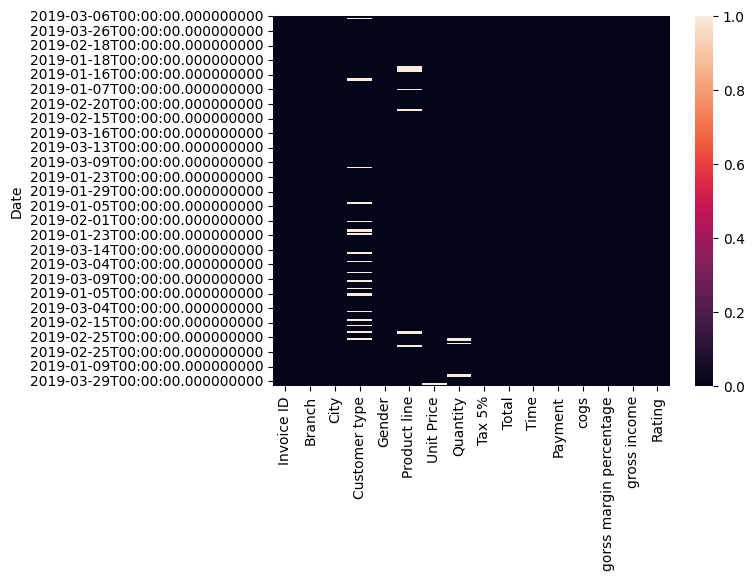

In [ ]:
sns.heatmap(B1.isnull())

Replacing missing values with the mean of each variable

In [ ]:
B1.fillna(B1.mean(),inplace=True)

<ipython-input-63-6deaae22b3a3>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  B1.fillna(B1.mean(),inplace=True)


this only deals with numerical values or integers. However, the string values are not affect. we will have to use the mode for string values

In [ ]:
B1.mode()

Invoice ID Branch    City Customer type  Gender         Product line  \
0    101-17-6199      A  Yangon        Normal  Female  Fashion accessories   
1    101-81-4070    NaN     NaN           NaN     NaN                  NaN   
2    102-06-2002    NaN     NaN           NaN     NaN                  NaN   
3    102-77-2261    NaN     NaN           NaN     NaN                  NaN   
4    105-10-6182    NaN     NaN           NaN     NaN                  NaN   
..           ...    ...     ...           ...     ...                  ...   
932  894-41-5205    NaN     NaN           NaN     NaN                  NaN   
933  895-03-6665    NaN     NaN           NaN     NaN                  NaN   
934  895-66-0685    NaN     NaN           NaN     NaN                  NaN   
935  896-34-0956    NaN     NaN           NaN     NaN                  NaN   
936  898-04-2717    NaN     NaN           NaN     NaN                  NaN   

     Unit Price  Quantity   Tax 5%     Total   Time Payment    cogs  \
0         83.77      10.0   4.1540   87.2340  14:42    Cash   83.08   
1           NaN       NaN   4.4640   93.7440  17:38     NaN   89.28   
2           NaN       NaN   8.3770  175.9170  19:48     NaN  167.54   
3           NaN       NaN  10.3260  216.8460    NaN     NaN  206.52   
4           NaN       NaN  10.3635  217.6335    NaN     NaN  207.27   
..          ...       ...      ...       ...    ...     ...     ...   
932         NaN       NaN      NaN       NaN    NaN     NaN     NaN   
933         NaN       NaN      NaN       NaN    NaN     NaN     NaN   
934         NaN       NaN      NaN       NaN    NaN     NaN     NaN   
935         NaN       NaN      NaN       NaN    NaN     NaN     NaN   
936         NaN       NaN      NaN       NaN    NaN     NaN     NaN   

     gorss margin percentage  gross income  Rating  
0                   4.761905        4.1540     6.0  
1                        NaN        4.4640     NaN  
2                        NaN        8.3770     NaN  
3                        NaN       10.3260     NaN  
4                        NaN       10.3635     NaN  
..                       ...           ...     ...  
932                      NaN           NaN     NaN  
933                      NaN           NaN     NaN  
934                      NaN           NaN     NaN  
935                      NaN           NaN     NaN  
936                      NaN           NaN     NaN  

[937 rows x 16 columns]

the mode for every variable is shown is row 0. we will use that to replace missing string values

In [ ]:
B1.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit Price                               83.77
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                   Cash
cogs                                     83.08
gorss margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [ ]:
B1.fillna(B1.mode().iloc[0], inplace=True)

now, lets check again for missing values to see if it worked

<Axes: ylabel='Date'>

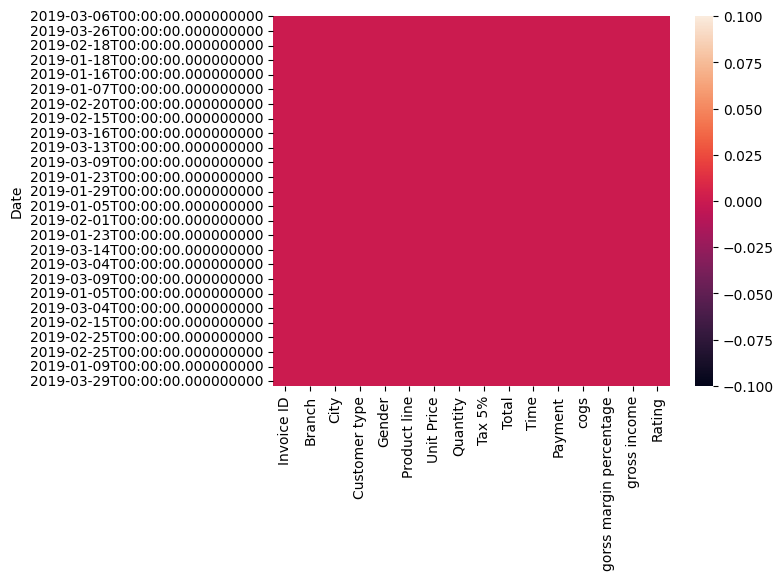

In [ ]:
sns.heatmap(B1.isnull())

In [ ]:
B1.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit Price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gorss margin percentage    0
gross income               0
Rating                     0
dtype: int64

Now, we can use Pandas ProfileReport to get a snapshot of the dataset. we can reload the data again just to make sure that it was not affected by the changes made

In [30]:
dataset = pd.read_csv('supermarket_sales.csv')
dataprofile = ProfileReport(dataset)
dataprofile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Task 5: Correlation Analysis

In [26]:
round(B1.corr(), 2)

<ipython-input-26-b98c11933177>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(B1.corr(), 2)


Unit Price  Quantity  Tax 5%  Total  cogs  \
Unit Price                     1.00      0.00    0.63   0.63  0.63   
Quantity                       0.00      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gorss margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.00     -0.03   -0.04  -0.04 -0.04   

                         gorss margin percentage  gross income  Rating  
Unit Price                                   NaN          0.63   -0.00  
Quantity                                     NaN          0.70   -0.03  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gorss margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

<ipython-input-31-5a8ad05043da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(B1.corr(), 2))


<Axes: >

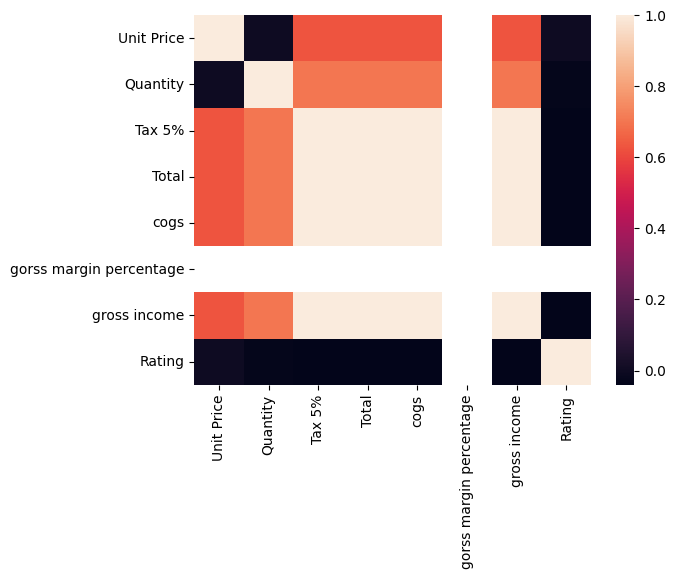

In [31]:
sns.heatmap(np.round(B1.corr(), 2))

<ipython-input-33-a76380c687de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(B1.corr(),2), annot=True)


<Axes: >

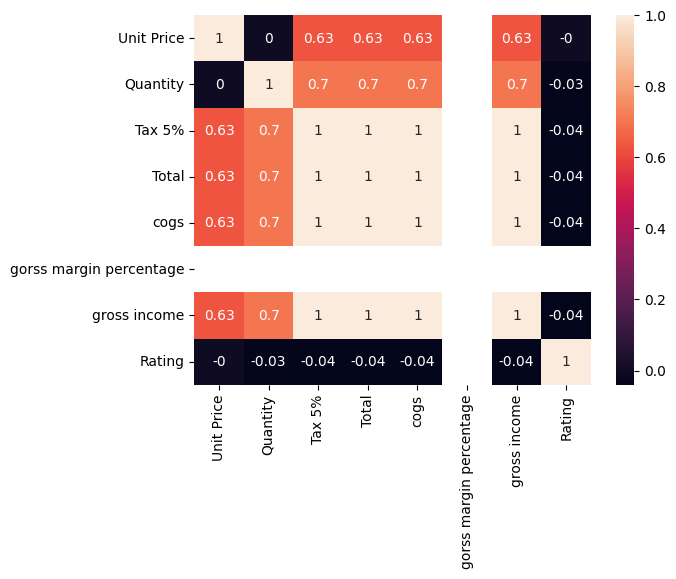

In [33]:
sns.heatmap(np.round(B1.corr(),2), annot=True)

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/